# Temperature Forecast Project using ML<br>
## Problem Statement:<br>
## Data Set Information:<br>

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.<br>

## Attribute Information:<br>

For more information, read [Cho et al, 2020].<br>
1. station - used weather station number: 1 to 25<br>
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')<br>
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6<br>
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9<br>
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5<br>
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100<br>
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5<br>
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6<br>
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9<br>
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4<br>
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97<br>
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97<br>
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98<br>
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97<br>
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7<br>
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6<br>
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8<br>
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7<br>
19. lat - Latitude (Â°): 37.456 to 37.645<br>
20. lon - Longitude (Â°): 126.826 to 127.135<br>
21. DEM - Elevation (m): 12.4 to 212.3<br>
22. Slope - Slope (Â°): 0.1 to 5.2<br>
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9<br>
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9<br>
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('temperature.csv')

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Dataset has  7752 entries and 25 columns. Here we have two dependent or target features: "Next_Tmax" and "Next_Tmin".

This is a MultiOutput Regression Problem.

# EDA AND PREPROCESSING

In [5]:
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

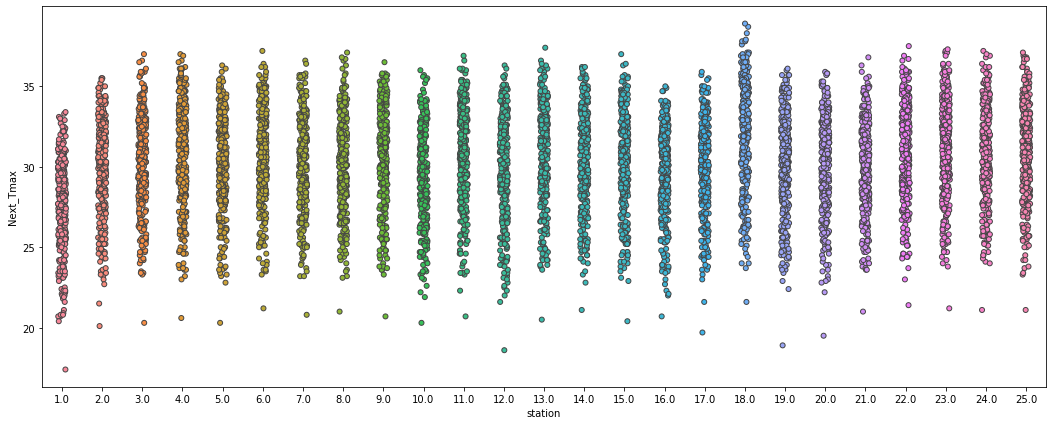

In [6]:
plt.figure(figsize=(18,7))
sns.stripplot(df['station'], df['Next_Tmax'], linewidth=1)

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

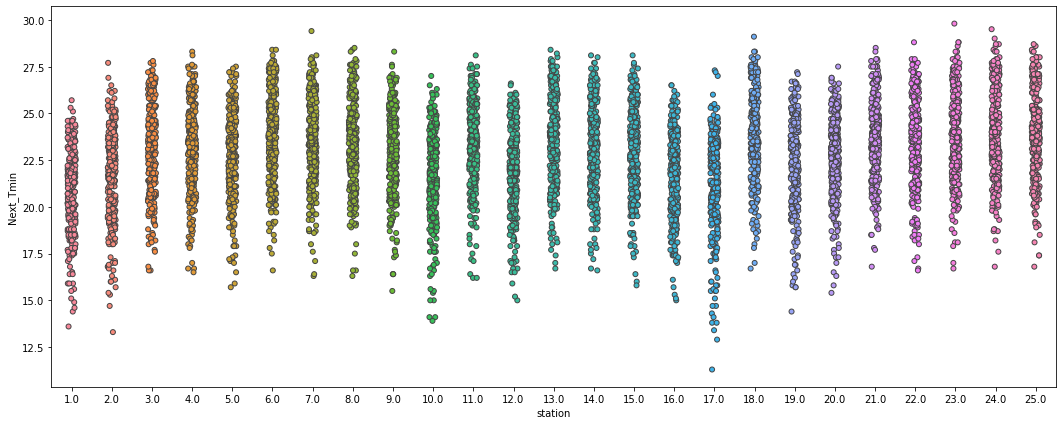

In [7]:
plt.figure(figsize=(18,7))
sns.stripplot(df['station'], df['Next_Tmin'], linewidth=1)

In [8]:
df = df[pd.notnull(df['station'])]

Dropped 2 rows with nan entries from feature station.

In [9]:
df.shape

(7750, 25)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(7588, 25)

We dropped 3% of data. That is acceptable.

In [12]:
df['station'] = df['station'].astype(int)

Changed the datatype from float to int.

In [13]:
df['Date']  = pd.to_datetime(df['Date'])

In [14]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year

In [15]:
df.drop('Date', axis=1, inplace=True)

<AxesSubplot:xlabel='month', ylabel='Next_Tmax'>

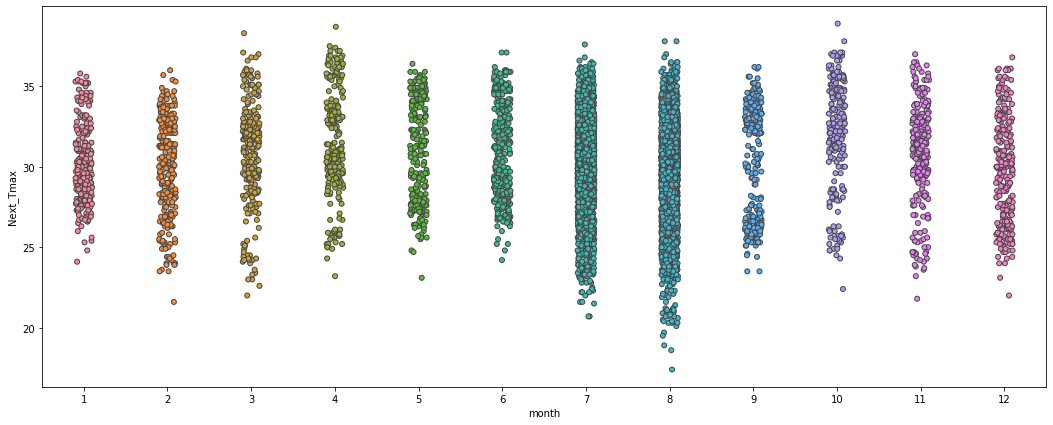

In [16]:
plt.figure(figsize=(18,7))
sns.stripplot(df['month'], df['Next_Tmax'], linewidth=1)

Month August has more variation, then July. January, May and June has least variation.

<AxesSubplot:xlabel='month', ylabel='Next_Tmin'>

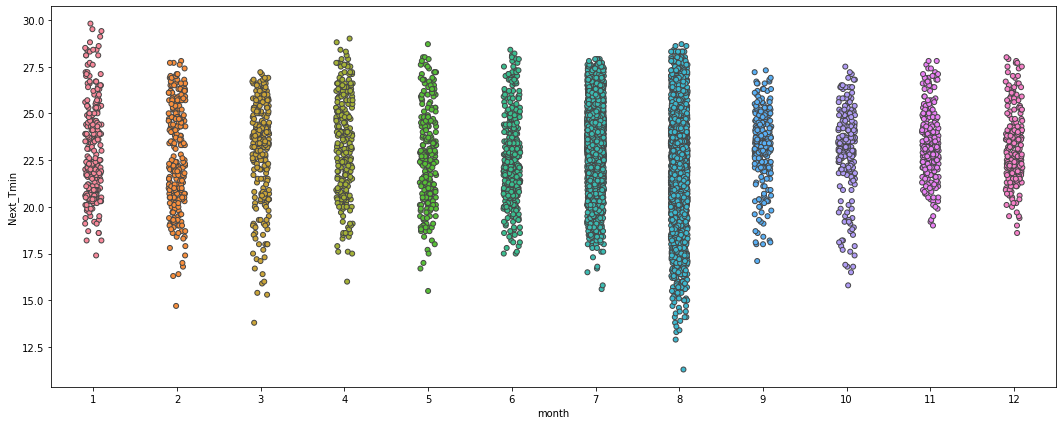

In [17]:
plt.figure(figsize=(18,7))
sns.stripplot(df['month'], df['Next_Tmin'], linewidth=1)

August has most variation for Min temperature and September, October, November and December has least variation.

<AxesSubplot:xlabel='day', ylabel='Next_Tmax'>

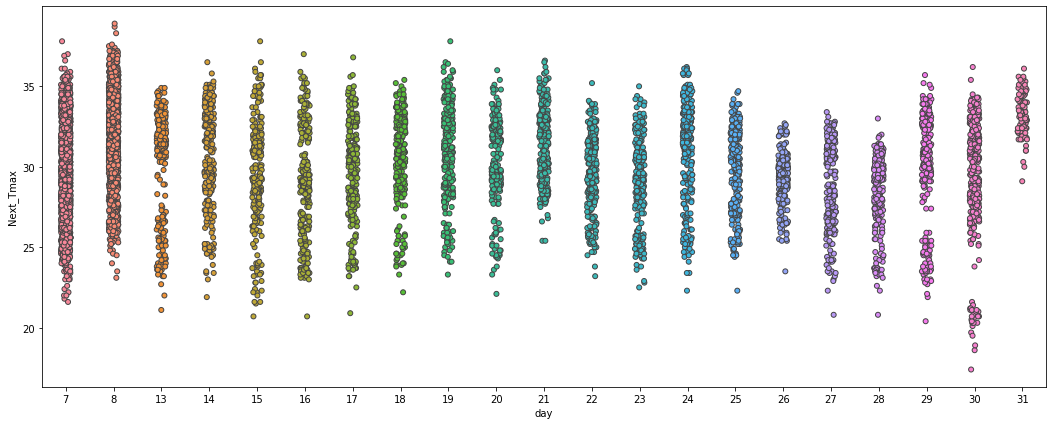

In [18]:
plt.figure(figsize=(18,7))
sns.stripplot(df['day'], df['Next_Tmax'], linewidth=1)

31 of every month has very less distribution.

<AxesSubplot:xlabel='day', ylabel='Next_Tmin'>

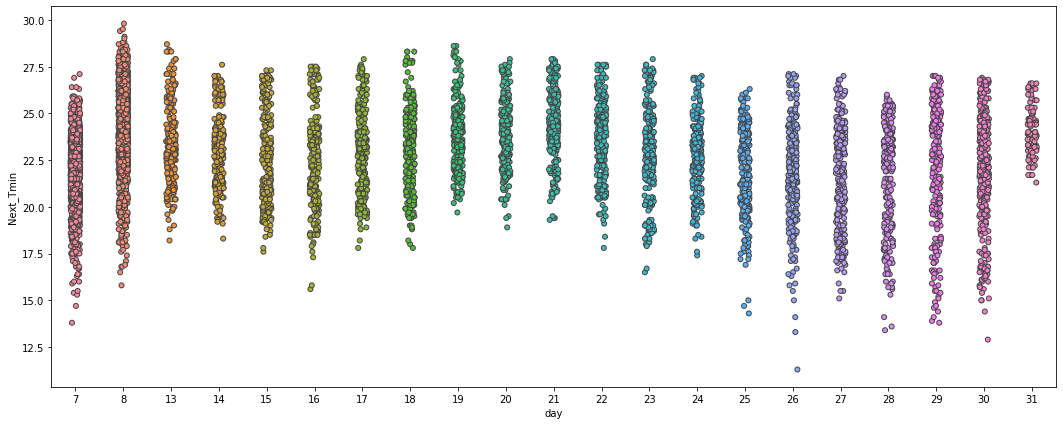

In [19]:
plt.figure(figsize=(18,7))
sns.stripplot(df['day'], df['Next_Tmin'], linewidth=1)

Same goes with min temperature.

<AxesSubplot:xlabel='year', ylabel='Next_Tmax'>

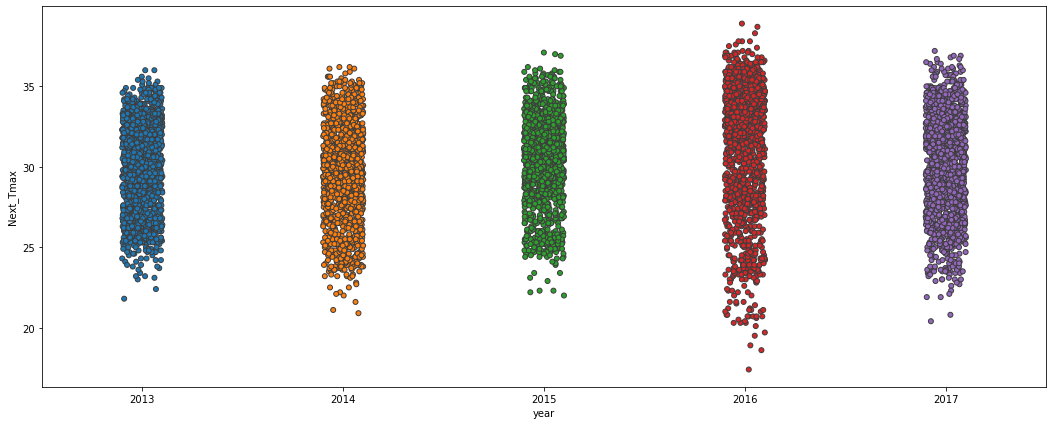

In [20]:
plt.figure(figsize=(18,7))
sns.stripplot(df['year'], df['Next_Tmax'], linewidth=1)

<AxesSubplot:xlabel='year', ylabel='Next_Tmin'>

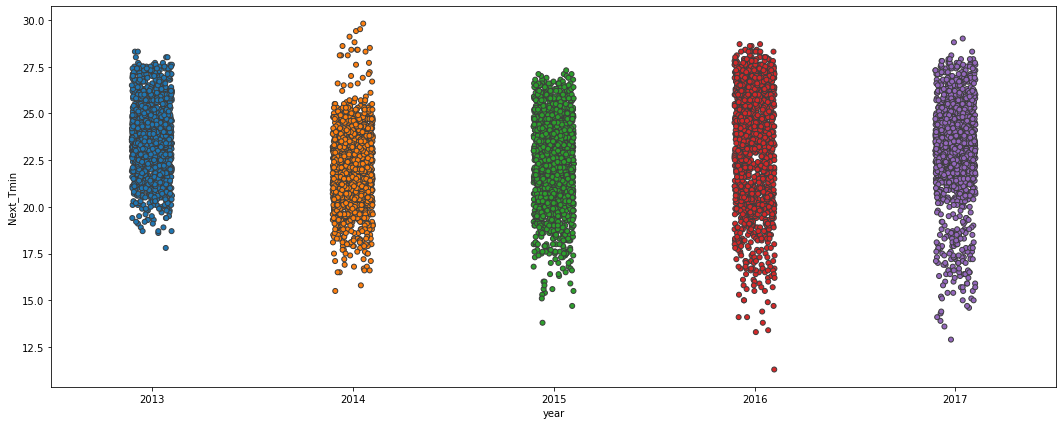

In [21]:
plt.figure(figsize=(18,7))
sns.stripplot(df['year'], df['Next_Tmin'], linewidth=1)

2016 shows greater spread of temperatures.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

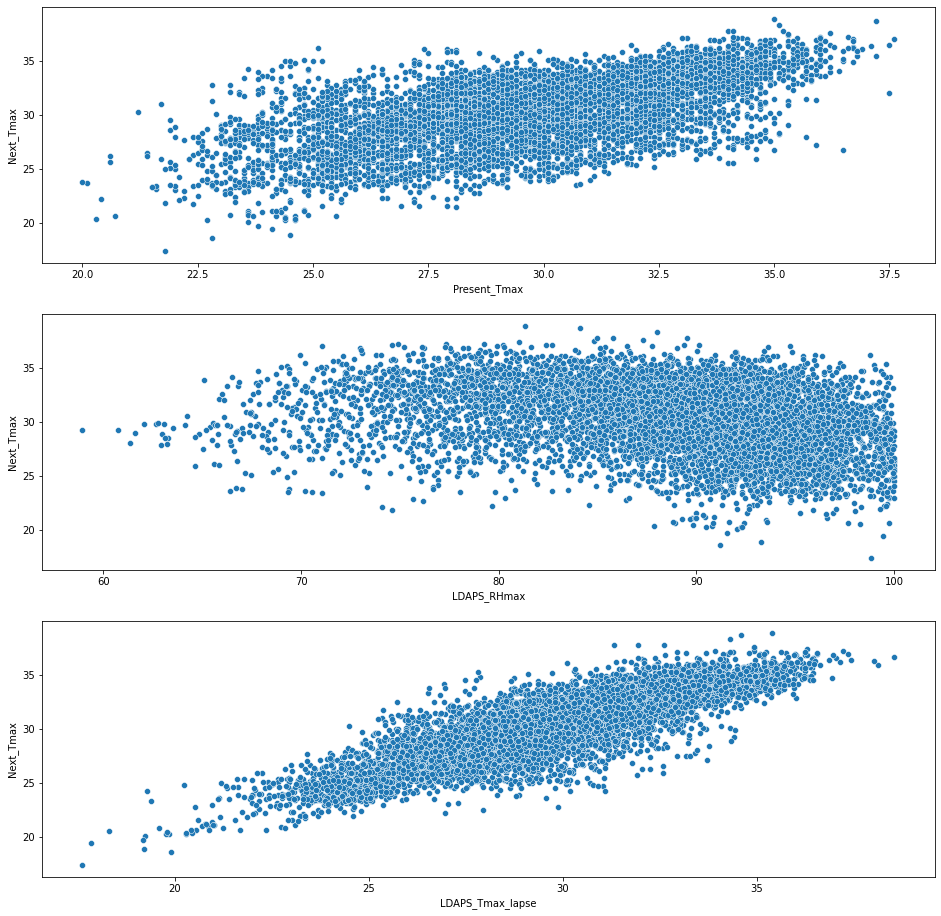

In [22]:
figure, axes = plt.subplots(3, figsize=(16,16))
sns.scatterplot(ax=axes[0], data=df, x= 'Present_Tmax', y= 'Next_Tmax')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_RHmax', y= 'Next_Tmax')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_Tmax_lapse', y= 'Next_Tmax')

If Present_Tmax and LDAPS_Tmax_lapse increases so will the Next_Tmax

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmin'>

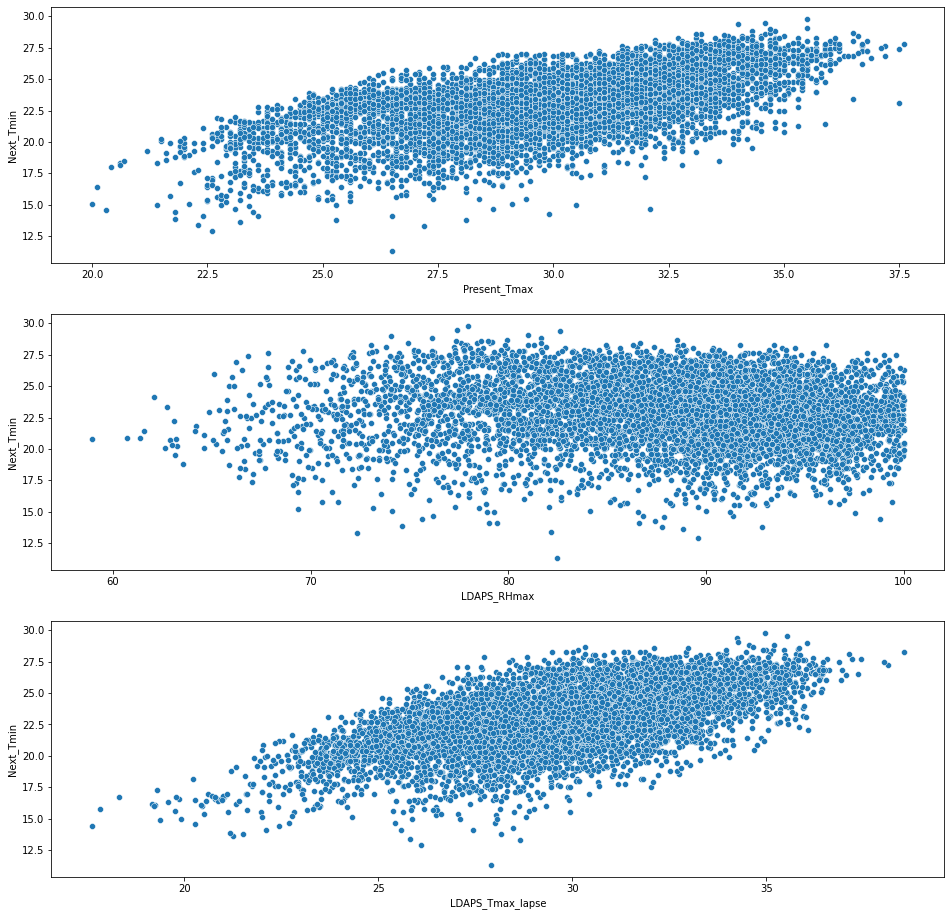

In [23]:
figure, axes = plt.subplots(3, figsize=(16,16))
sns.scatterplot(ax=axes[0], data=df, x= 'Present_Tmax', y= 'Next_Tmin')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_RHmax', y= 'Next_Tmin')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_Tmax_lapse', y= 'Next_Tmin')

If Present_Tmax and LDAPS_Tmax_lapse increases so will the Next_Tmin

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

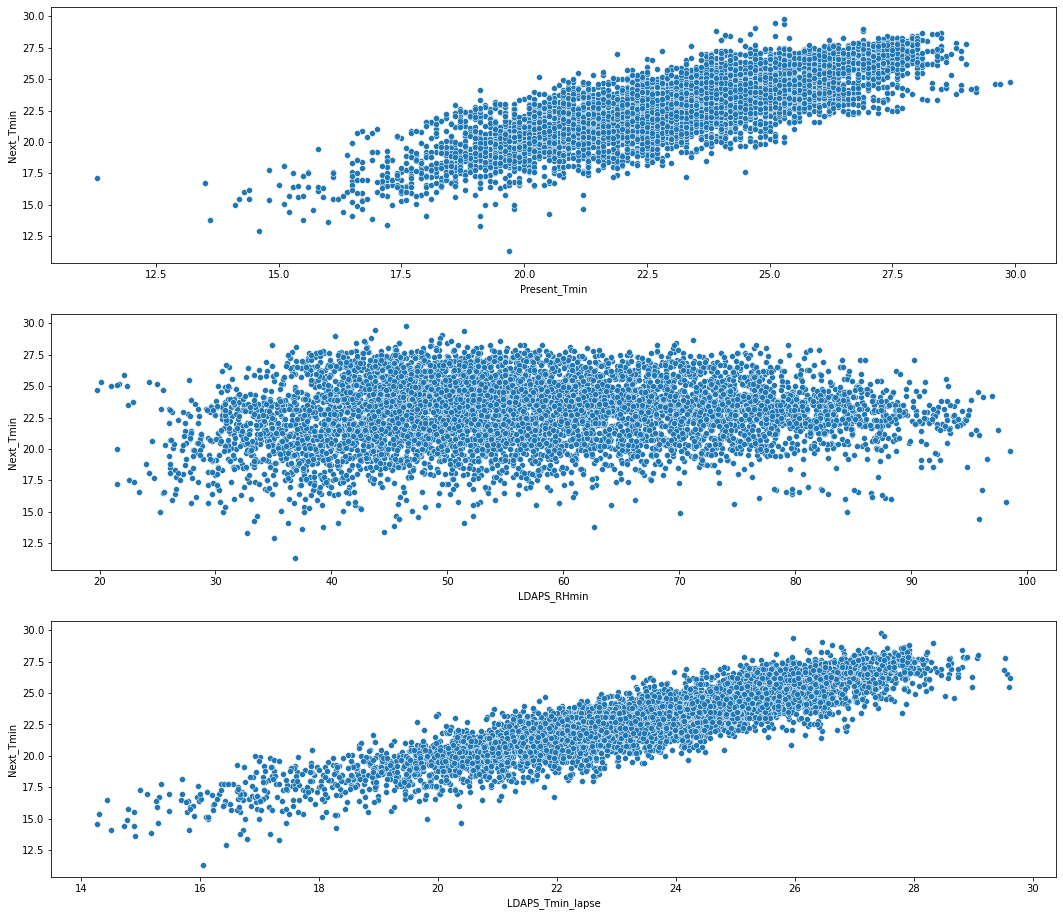

In [24]:
figure, axes = plt.subplots(3, figsize=(18,16))
sns.scatterplot(ax=axes[0], data=df, x= 'Present_Tmin', y= 'Next_Tmin')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_RHmin', y= 'Next_Tmin')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_Tmin_lapse', y= 'Next_Tmin')

If Present_Tmin and LDAPS_Tmin_lapse increases so will the Next_Tmin.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

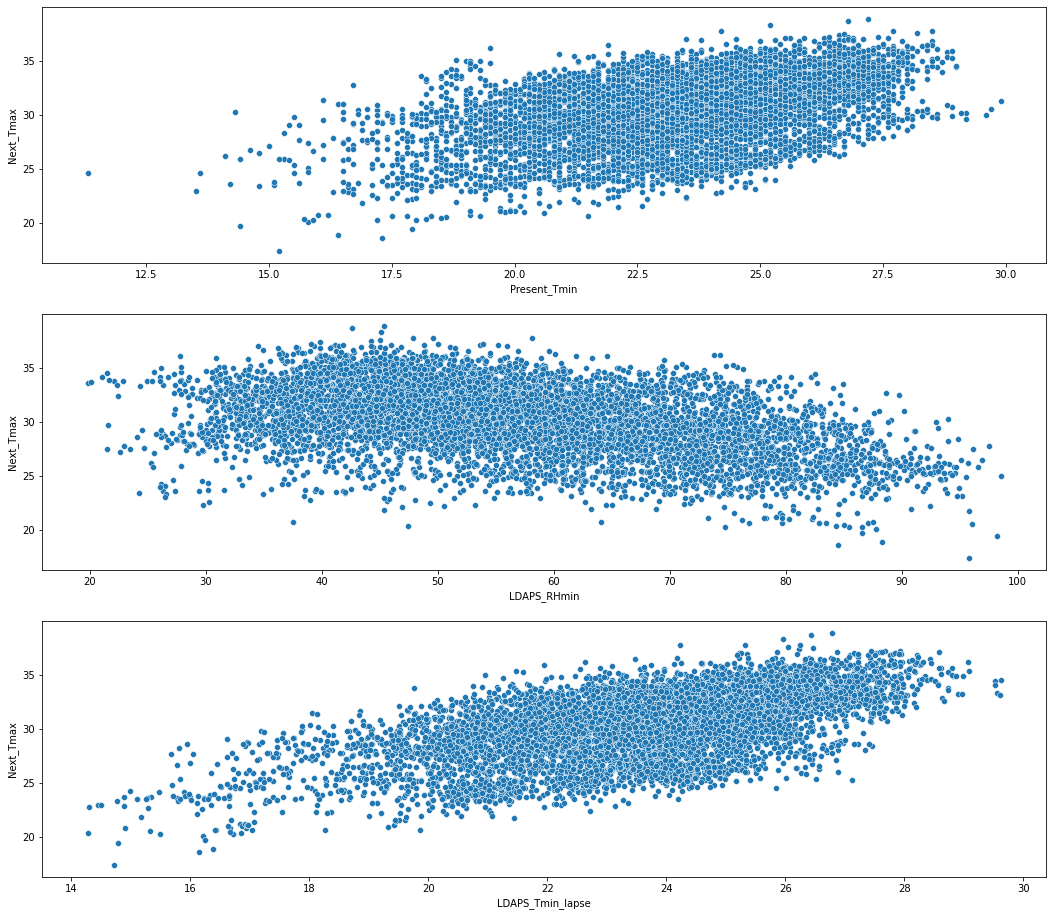

In [25]:
figure, axes = plt.subplots(3, figsize=(18,16))
sns.scatterplot(ax=axes[0], data=df, x= 'Present_Tmin', y= 'Next_Tmax')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_RHmin', y= 'Next_Tmax')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_Tmin_lapse', y= 'Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

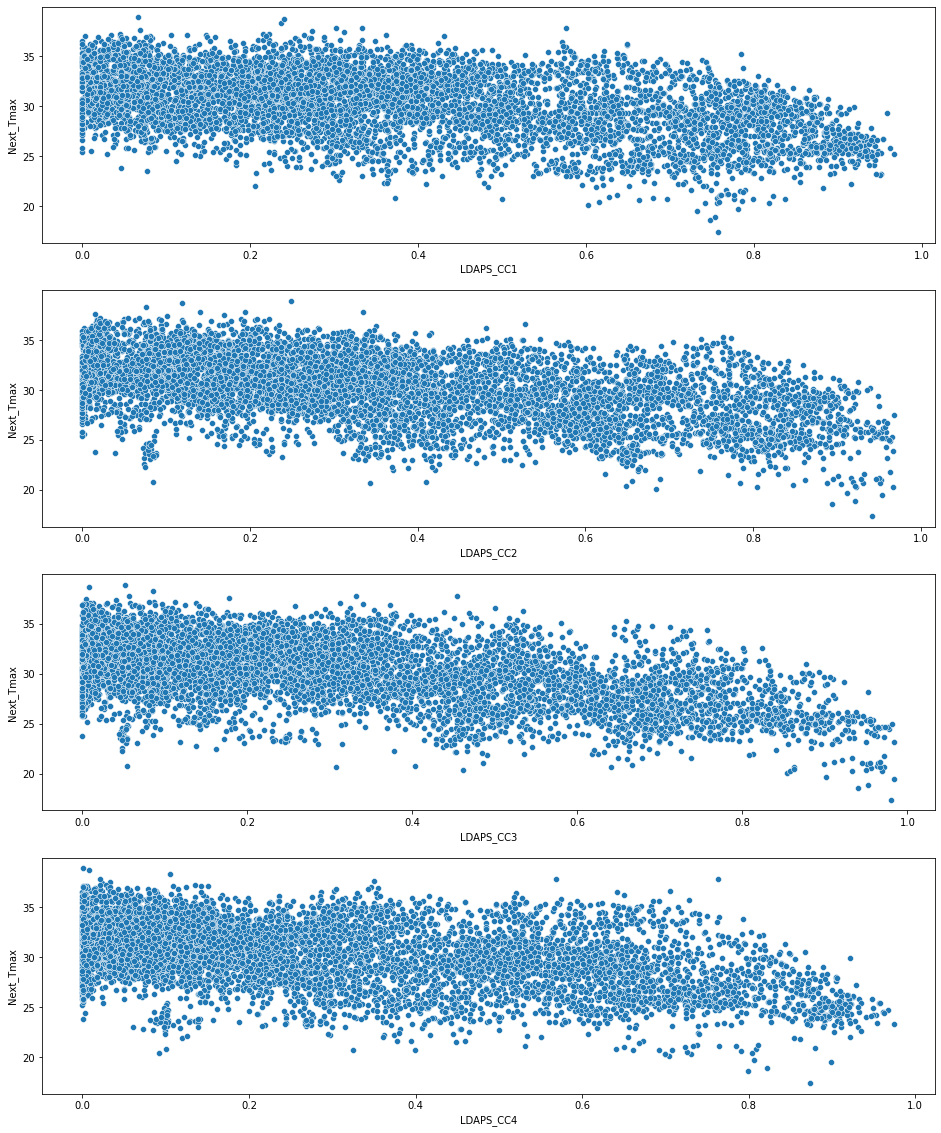

In [26]:
figure, axes = plt.subplots(4, figsize=(16,20))
sns.scatterplot(ax=axes[0], data=df, x= 'LDAPS_CC1', y= 'Next_Tmax')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_CC2', y= 'Next_Tmax')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_CC3', y= 'Next_Tmax')
sns.scatterplot(ax=axes[3], data=df, x= 'LDAPS_CC4', y= 'Next_Tmax')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

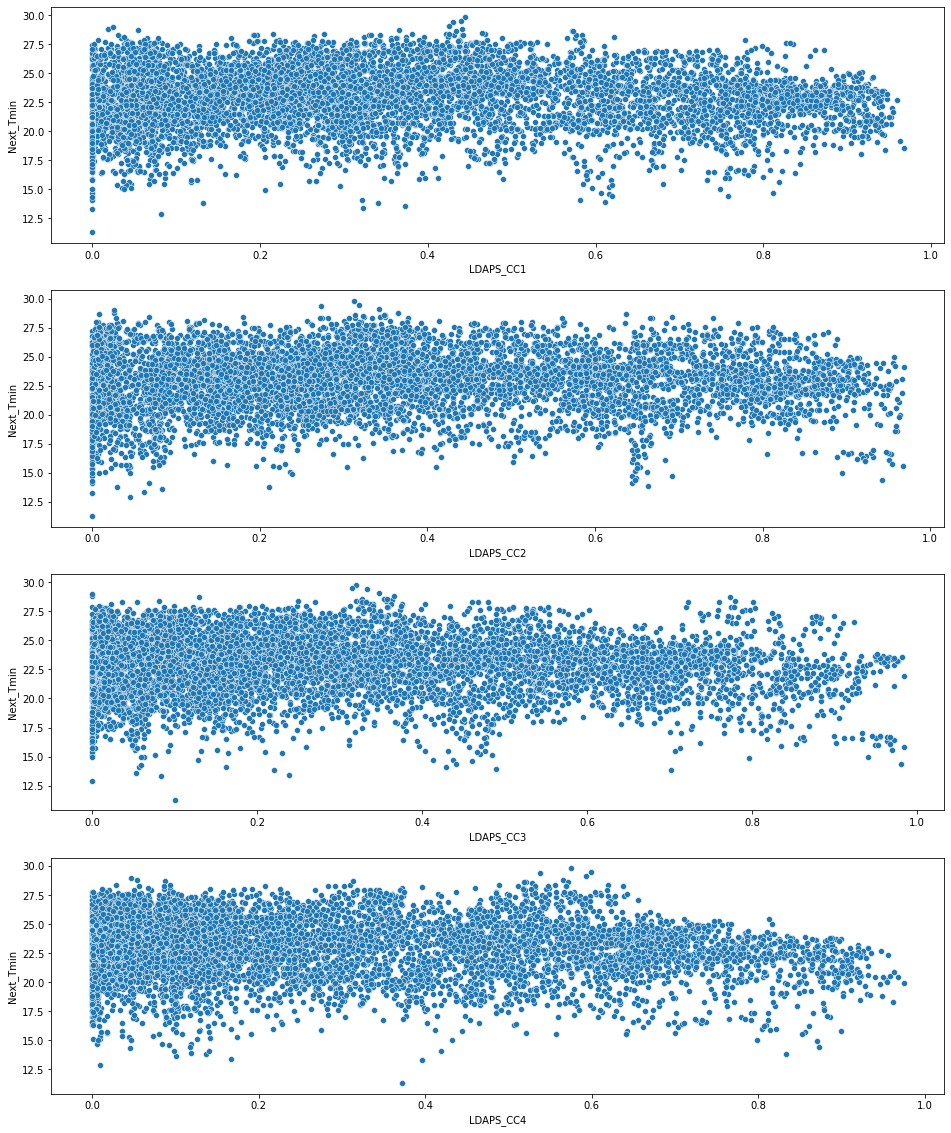

In [27]:
figure, axes = plt.subplots(4, figsize=(16,20))
sns.scatterplot(ax=axes[0], data=df, x= 'LDAPS_CC1', y= 'Next_Tmin')
sns.scatterplot(ax=axes[1], data=df, x= 'LDAPS_CC2', y= 'Next_Tmin')
sns.scatterplot(ax=axes[2], data=df, x= 'LDAPS_CC3', y= 'Next_Tmin')
sns.scatterplot(ax=axes[3], data=df, x= 'LDAPS_CC4', y= 'Next_Tmin')

The above two plots show linear and slight downward trends.

In [29]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'day', 'year'],
      dtype='object')

In [30]:
df[['lat', 'lon','DEM', 'Slope', 'Solar radiation']].describe()

lat         lon          DEM        Slope  Solar radiation
count  7588.000000  7588.00000  7588.000000  7588.000000      7588.000000
mean     37.544792   126.99142    61.918136     1.259755      5343.724208
std       0.050428     0.07922    54.323529     1.372748       429.782561
min      37.456200   126.82600    12.370000     0.098500      4329.520508
25%      37.510200   126.93700    28.700000     0.271300      5001.485717
50%      37.550700   126.99500    45.716000     0.618000      5441.987305
75%      37.577600   127.04200    59.832400     1.767800      5729.485840
max      37.645000   127.13500   212.335000     5.178200      5992.895996

'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',<br>
Has a fixed range however, "lon" "Dem" and "Solar radiation" has higher range of values. We will need to bring all the scale to some fixed scale.

<AxesSubplot:>

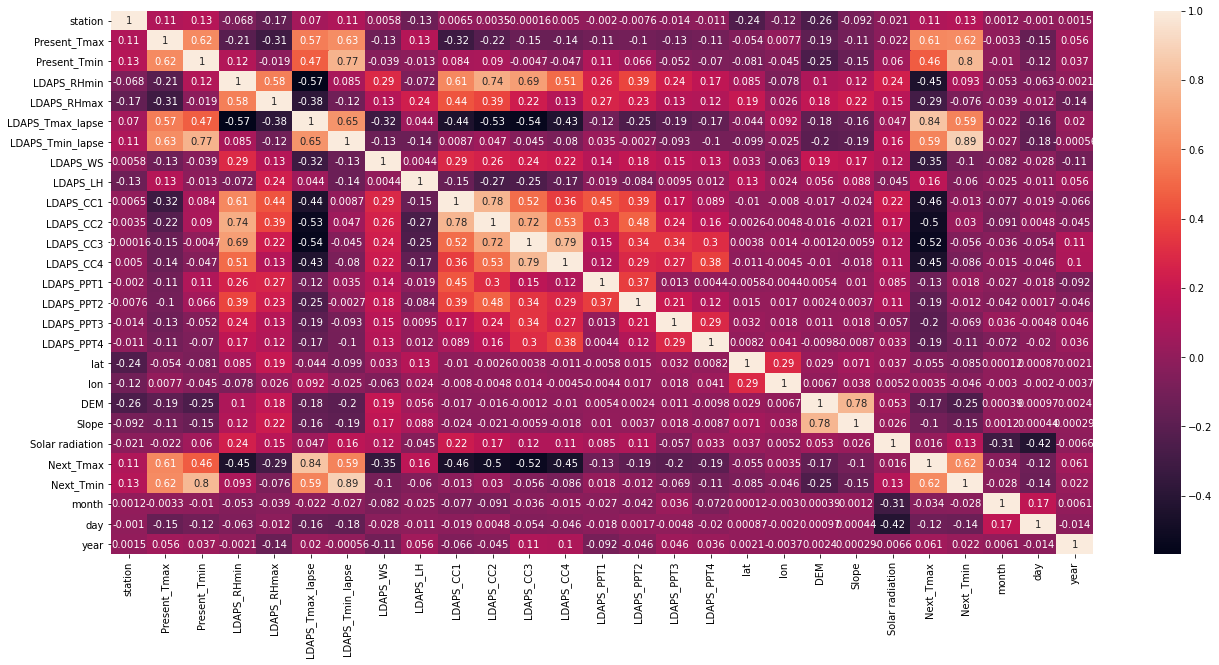

In [31]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(), annot=True)

In [32]:
corr = df.corr()
corr[['Next_Tmax', 'Next_Tmin']].sort_values(by=['Next_Tmax', 'Next_Tmin'], ascending=False)

Next_Tmax  Next_Tmin
Next_Tmax          1.000000   0.616629
LDAPS_Tmax_lapse   0.835729   0.589963
Next_Tmin          0.616629   1.000000
Present_Tmax       0.610357   0.621048
LDAPS_Tmin_lapse   0.592119   0.886513
Present_Tmin       0.463523   0.796975
LDAPS_LH           0.156779  -0.060392
station            0.107747   0.128184
year               0.061211   0.021617
Solar radiation    0.016145   0.125517
lon                0.003502  -0.045758
month             -0.033684  -0.028344
lat               -0.055367  -0.085136
Slope             -0.104279  -0.148379
day               -0.122303  -0.135865
LDAPS_PPT1        -0.125954   0.018031
DEM               -0.174578  -0.249303
LDAPS_PPT2        -0.186722  -0.012462
LDAPS_PPT4        -0.190720  -0.114900
LDAPS_PPT3        -0.203554  -0.068664
LDAPS_RHmax       -0.289788  -0.076415
LDAPS_WS          -0.351107  -0.102021
LDAPS_RHmin       -0.446824   0.093249
LDAPS_CC4         -0.454039  -0.086197
LDAPS_CC1         -0.459705  -0.012877
LDAPS_CC2         -0.498295   0.030358
LDAPS_CC3         -0.523061  -0.056490

As all the values are predictions. we use the month, year and day to build a model.

# STANDARDISING

In [33]:
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

We have divided the data set into independent and target features.<br>
We have also scaled our data. We will proceed to model Building.

# MODEL BUILDING.

## Finding the best random state for the model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8281042929867102 on random state 60


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=60)

## Best Algorithm for our problem.

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 1.5022818845815464
mean_absolute_error: 0.9196763758742235
r2_score: 0.8281042929867102
0.8055414195429264


In [39]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 1.6782312252964433
mean_absolute_error: 0.9416666666666655
r2_score: 0.8002451371663759
1.0


In [40]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 0.7247008731884061
mean_absolute_error: 0.6308507905138345
r2_score: 0.9141462372885587
0.9864236969582874


In [41]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 0.9567600790513835
mean_absolute_error: 0.7316534914360993
r2_score: 0.8871479973146446
0.9188613718723493


As this is a Multi output Regression problem Support vector, AdaBoost and Gradient Boost regression algorithms will not work.<br>
**We will resolve this by using MultiOutputRegressor**. This will help us use all the other regression techniques that cannot predict two features at a time. Using MultiOutputRegressor will help create two models for each of the features.

In [42]:
from sklearn.multioutput import MultiOutputRegressor

In [43]:
sv = SVR()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()

In [44]:
multi_sv = MultiOutputRegressor(sv)
multi_sv.fit(x_train,y_train)
pred = multi_sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(multi_sv.score(x_train,y_train))

mean_squared_error: 0.8458874067016767
mean_absolute_error: 0.6553428709752411
r2_score: 0.9027849054236767
0.9139083832698074


In [45]:
multi_ab = MultiOutputRegressor(ab)
multi_ab.fit(x_train,y_train)
pred = multi_ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(multi_sv.score(x_train,y_train))

mean_squared_error: 1.7209094429069167
mean_absolute_error: 1.0419971104776653
r2_score: 0.800150760444731
0.9139083832698074


In [46]:
multi_gb = MultiOutputRegressor(gb)
multi_gb.fit(x_train,y_train)
pred = multi_gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(multi_sv.score(x_train,y_train))

mean_squared_error: 0.9684515448992719
mean_absolute_error: 0.746859949784983
r2_score: 0.8878876487840853
0.9139083832698074


RandomForestRegressor, KNearestNeighbor and MultiOutputRegressor Support vector and GradientBoost has performed really well.

## Crossvalidation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.7385510300464806


In [49]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: 0.7196746041879327


In [50]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : 0.4649841378311058


In [51]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.5571917987099729


In [52]:
multi_sv1 = cross_val_score(multi_sv, x, y, cv=5)

print("Cross validation score of Support Vector:", multi_sv1.mean())

Cross validation score of Support Vector: 0.696573875294454


In [53]:
multi_ab1 = cross_val_score(multi_ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", multi_ab1.mean())

Cross validation score of AdaBoost: 0.7129055881877555


In [54]:
multi_gb1 = cross_val_score(multi_gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", multi_gb1.mean())

Cross validation score of GradientBoost: 0.7560018650236795


RandomForestRegressor, KNearestNeighbor and MultiOutputRegressor Support vector and GradientBoost has performed really well here as well.

## Hyperparameter Tuning with RandomForestRegression

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_estimators':[10,50,100,150], 'max_depth': np.arange(2,10),
             'criterion':['mse','mae'], 'max_features':['auto','sqrt', 'log2']}

In [57]:
GCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 50, 100, 150]})

In [58]:
#Printing the best parameters.
GCV.best_params_

{'n_estimators': 50,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'mse'}

## Model with RandomForestRegression

In [65]:
model1 = RandomForestRegressor(n_estimators=50, criterion='mse', max_depth=9, max_features='log2')
model1.fit(x_train,y_train)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model1.score(x_train,y_train))
pred1 = model1.predict(x_test)

mean_squared_error: 0.9684515448992719
mean_absolute_error: 0.746859949784983
r2_score: 0.8878876487840853
0.9082923305566749


## Hyperparameter Tuning with KNeighborsRegressor

In [60]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'n_neighbors': np.arange(2,10),
              'weights':['uniform','distance'],'p':[1,2],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [61]:
GCV = RandomizedSearchCV(KNeighborsRegressor(), parameters, cv=5)
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [62]:
#Printing the best parameters.
GCV.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 6, 'algorithm': 'brute'}

## Model with KNeighborsRegressor

In [66]:
model2 = KNeighborsRegressor(weights='uniform', p=1, n_neighbors= 6, algorithm= 'brute')
model2.fit(x_train,y_train)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(model1.score(x_train,y_train))
pred2 = model2.predict(x_test)

mean_squared_error: 0.9684515448992719
mean_absolute_error: 0.746859949784983
r2_score: 0.8878876487840853
0.9082923305566749


# Conclusion

Both the algorithm has same output, we will use any one of the model and save for submission as we have a confidence of fit of about 88.79%.

# SAVING THE MODEL.

In [64]:
import joblib
joblib.dump(model2,"Temperature_Forecast_Project_using_ML_submission.pkl")

['Temperature_Forecast_Project_using_ML_submission.pkl']